# ABM animieren

Die Animation von agentenbasierten Modellen ist eine gute Methode, deren Dynamiken über die Zeit zu untersuchen und intuitiv zugänglich zu machen. Auch Fehler in der Programmierung fallen durch die Animation bestimmter Modell-Aspekte recht gut auf. Für Erstellung von Animationen in Python bietet sich v.a. das Modul Matplotlib an. Mit diesem kann man prinzipiell eine große Bandbreite an Animationen erstellen. Allerdings ist die Umsetzung von Animationen direkt mit Matplotlib anfangs etwas unnötig kompliziert. Aus diesem Grund gibt es das [Modul Celluloid](https://github.com/jwkvam/celluloid), welches eine vereinfachte Bedinung für die Erstellung von Animationen mit Matplotlib bereitstellt.

## Installation der benötigten Pakete

Bevor wir mit Celluloid arbeiten können, müssen Celluloid sowie ein weiteres Paket installieren. Leider muss man beide auf unterschiedliche Wege installieren.

### ffmpeg installieren

Für die Erstellung von Animationen benötigt Celluloid das Paket **ffmpeg**. Dieses Paket kannst du, genau wie wir im vorherigen Kapitel Matplotlib installiert haben, über den Anaconda-Navigator installieren.



### Celluloid über Pip installieren

Celluloid ist leider in Anaconda nicht verfügbar, weshalb wir hier einen anderen Weg für die Installation wählen müssen. Statt Pakete über Anaconda zu installieren, installieren wir das Paket über **Pip**. Pip ist tatsächlich der ganz klassische Weg, um Pakete in Python zu installieren. Mittels Pip können wir direkt über die Spyder-Konsole Pakete installieren. 

Die allgemein Syntax für das Installieren neuer Pakete mit Pip in der Spyder Konsole lautet so:

```python
! pip install NAME_OF_MODULE
```

Möchte man konkret z.B. das Modul `Celluloid` installieren, dann müsste man das hier in die Spyder-Konsole eintippen:

```python
! pip install Celluloid
```

```{warning}
In der Vergangenheit gab es immer wieder Probleme, wenn ffmpeg über Pip installiert wurde. Du solltest daher das Paket **ffmpeg** auf keinen Fall über Pip installieren, sondern dafür den Anaconda-Navigator nutzen!
```

## Animationen mit Matplotlib und Celluloid

Das Prinzip der Erstellung von Animationen mit Celluloid ist relativ simpel. Jede Animation besteht aus mehreren Matplotlib-Grafiken, welche nacheinander erstellt werden und dann zu einem "Film" zusammengesetzt werden. Während wir unsere Grafiken/Diagramme ganz normal weiterhin mit Matplotlib erstellen, übernimmt das Modul Celluloid das *Sammeln* und *Zusammensetzen* der Grafiken zu einer Animation.

Schauen wir uns ein Beispiel an. 

- Unten importiere ich zunächst Matplotlib und Celluloid. Zudem erstelle ich eine Liste mit Matrizen namens `list_of_matrices`, welche nacheinander mittels Matplotlib in ein `imshow()`-Diagramm eingezeichet werden sollen.

In [1]:
import matplotlib.pyplot as plt
import celluloid as cld

# Liste mit Matrizen, welche nacheinander ins Diagramm gezeichnet werden sollen
list_of_matrices = [
    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]],
    
    [[1, 0, 0],
     [0, 0, 0],
     [0, 0, 0]],
    
    [[0, 1, 0],
     [0, 0, 0],
     [0, 0, 0]],
    
    [[0, 0, 1],
     [0, 0, 0],
     [0, 0, 0]],
    
    [[0, 0, 0],
     [0, 0, 1],
     [0, 0, 0]],

    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 1]],

    [[0, 0, 0],
     [0, 0, 0],
     [0, 1, 0]],
    
    [[0, 0, 0],
     [0, 0, 0],
     [1, 0, 0]],

    [[0, 0, 0],
     [1, 0, 0],
     [0, 0, 0]],
    
    [[0, 0, 0],
     [0, 1, 0],
     [0, 0, 0]],
    
    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]],
]

- Im nächsten Schritt erstelle ich mit `leinwand, diagramm = plt.subplots()`wie gewohnt Figure- und Axes-Objekte, mit denen wir die Diagramme erstellen. 


- In der Zeile `camera = cld.Camera(leinwand)` wird dann ein `Camera`-Objekt aus dem Modul Celluloid erstellt. Dieses `Camera`-Objekt übernimmt die Aufgabe, die Diagramme zwischenzuspeichern und später zur Animation zusammenzusetzen. Man kann sich das so vorstellen, als ob ein `Camera`-Objekt Fotos von unseren Diagrammen knippst und dann diese Fotos zur Erstellung des Films verwendet. Damit die Kamera richtig ausgerichtet ist und Fotos von den richtigen Diagrammen schießt, müssen wir die Kamera auf die richtige "Leinwand", auf die wir die Diagramme zeichnen, ausrichten. Daher fügen wir bei der Erstellung des `Camera`-Objektes das Figure-Objekt `leinwand` als Input in das Objekt ein, um das `Camera`-Objekt auf dieses Figure-Objekt auszurichten.


- Es startet ein For-Loop, in welchem zunächst jede Matrix mittels `diagramm.imshow(matrix, vmin=0, vmax=1)` in ein entsprechendes Diagramm übersetzt wird.


- Per `camera.snap()` wird nun das "Foto" vom eben gezeichneten Diagramm geschossen und der `camera` gespeichert.


- Nachdem der For-Loop vorüber ist werden mit `animation = camera.animate()` die geschossenen Fotos zu einer Animation zusammengesetzt und als Animations-Objekt in der Variable `animation` gespeichert.


- Um die Animation als Video auf dem Computer zu speichern führe ich die Methode `animation.save()` aus und gebe als Input einen Dateipfad an. Das Video wird als .mp4-Datei gespeichert, weshalb der verwendete Dateipfad auf ".mp4" enden muss. Zudem stelle ich über den Parameter `dpi` noch die Videoqualität ein, welche ich auf 300dpi setze. Mit dem Parameter `fps` (frames per second) kann man die Abspielgeschwindigkeit des Videos bestimmen.

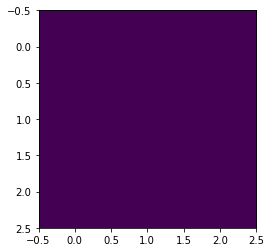

In [2]:
# Figure- und Axes-Objekt erstellen
leinwand, diagramm = plt.subplots()

# Celluloid-Kamera erstellen und auf Figure-Objekt (leinwand) ausrichten
camera = cld.Camera(leinwand)

# Liste von Matrizen durchgehen
for matrix in list_of_matrices:
    
    # auf Diagramm zeichnen
    diagramm.imshow(matrix, vmin=0, vmax=1)
    
    # Foto machen
    camera.snap()

# Animation aus geschossenen Fotos erstellen
animation = camera.animate()

# Animation abspeichern
animation.save("my_first_animation.mp4", dpi=300, fps=5)

Nun sollte man das Video an der entsprechenden Stelle auf dem Computer finden und einfach mit einem geeigneten Videoplayer abspielen. 

Da dieses Dokument in einem Jupyter Notebook geschrieben ist, kann ich das Video auch hier anzeigen lassen (was in Spyder leider nicht geht):

In [3]:
from IPython.display import HTML
HTML(animation.to_jshtml())

```{admonition} Übrigens
Animationen können prinzipiell mit jeder Art von Matplotlib-Diagramm erstellt werden, also z.B. auch mit Linien- oder Streudiagrammen.
```

Sieht man von der Diagramm-Erstellung mittels Matplotlib ab, so kann man die Schritte, welche man mit Celluloid vollziehen muss, um aus mehreren Diagrammen eine Animation zu erstellen, so zusammenfassen:
1. Celluloid importieren: `import celluloid as cld`
2. Kamera erstellen und auf Figure-Objekt ausrichten `camera = cld.Camera(HIER FIGURE-OBJEKT EINSETZEN)`
3. Fotos schießen von Diagrammen, welche (meist) mittels For-Loops nacheinander gezeichnet werden: `camera.snap()`
4. Fotos zu Film zusammensetzen und Animationsobjekt erstellen: `animation = camera.animate()`
5. Animation als Video exportieren: `animation.save(HIER DATEIPFAD EINFÜGEN)`